In [161]:
import pandas as pd
import numpy as np

In [162]:
df = pd.read_csv("D:\MINI_Project\DoAn3\perdict_train_XGBoost\students_grading_dataset_clean.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_6792\1919720498.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\MINI_Project\DoAn3\perdict_train_XGBoost\students_grading_dataset_clean.csv")


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,C,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,D,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,B,13.3,Yes,No,Master's,Medium,6,4.5


In [163]:
#df.drop(['Student_ID','First_Name','Last_Name','Email','Attendance (%)','Midterm_Score','Final_Score','Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score'],
#        axis=1, inplace=True) # set axis = 1 to remove columns

df.drop(['Student_ID','First_Name','Last_Name','Email','Midterm_Score','Final_Score','Quizzes_Avg','Projects_Score','Total_Score'],
        axis=1, inplace=True) # set axis = 1 to remove columns

df.head()

,Gender,Age,Department,Attendance (%),Assignments_Avg,Participation_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,73.69,7.34,C,10.3,Yes,No,Master's,Medium,1,5.9
1,Male,18,Business,97.71,74.23,8.80,B,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,85.85,0.47,C,12.4,Yes,No,High School,Low,9,6.1
3,Female,24,Engineering,90.38,68.10,0.42,D,25.5,No,Yes,High School,Low,8,4.9
4,Female,23,CS,59.41,67.66,6.43,B,13.3,Yes,No,Master's,Medium,6,4.5


In [164]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
find_category = df.dtypes == object
find_category_list = df.columns[find_category].to_list() # Lấy tên các cột là biến phân loại (kiểu object) thành danh sách
find_category_list

['Gender',
 'Department',
 'Grade',
 'Extracurricular_Activities',
 'Internet_Access_at_Home',
 'Parent_Education_Level',
 'Family_Income_Level']

In [165]:
# Áp dụng LabelEncoder cho từng cột phân loại
# Duyệt từng cột trong danh sách, và dùng LabelEncoder để mã hóa giá trị văn bản thành số nguyên
df[find_category_list] = df[find_category_list].apply(lambda col: le.fit_transform(col))
df.head()

,Gender,Age,Department,Attendance (%),Assignments_Avg,Participation_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,3,97.36,73.69,7.34,2,10.3,1,0,2,2,1,5.9
1,1,18,0,97.71,74.23,8.80,1,27.1,0,0,1,1,4,4.3
2,1,24,2,99.52,85.85,0.47,2,12.4,1,0,1,1,9,6.1
3,0,24,2,90.38,68.10,0.42,3,25.5,0,1,1,1,8,4.9
4,0,23,1,59.41,67.66,6.43,1,13.3,1,0,2,2,6,4.5


In [ ]:
# chia dữ liệu train, test

from sklearn.model_selection import train_test_split

"""train, test = train_test_split(df,test_size=0.2, random_state=42)
x_train = train.drop(columns=['Grade'])
y_train = train['Grade']

x_test = test.drop(columns=['Grade'])
y_test = test['Grade']
"""
# 👉 Chia tập dữ liệu thành train và test theo tỷ lệ 80-20
train, test = train_test_split(df, test_size=0.2, random_state=0, stratify=df['Grade'])# Sử dụng stratify để đảm bảo phân bố các lớp (Grade) giống nhau ở cả hai tập
x_train = train.drop(columns=['Grade'])
y_train = train['Grade']

x_test = test.drop(columns=['Grade'])
y_test = test['Grade']

In [167]:
# Train model
"""
Đây là một thuật toán ensemble (tổng hợp nhiều cây quyết định nhỏ) sử dụng kỹ thuật Gradient Boosting để cải thiện dần kết quả phân loại qua từng vòng lặp.

Nó huấn luyện một chuỗi các cây quyết định yếu (weak learners).

Mỗi cây mới sẽ học sai số (residual) của mô hình trước đó.

Mục tiêu là giảm loss function qua từng bước bằng cách đi theo gradient giảm dần.


"""
from sklearn.ensemble import GradientBoostingClassifier # Classifier dùng cho phân loại

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [168]:
# tính toán Accuracy trên test
Accuracy = model.score(x_test,y_test)
print(Accuracy)

0.616


In [170]:
# XGBoost (pip install xgboost)
import xgboost as xgb

"""model_xgb = xgb.XGBClassifier(random_state=42, n_etimators=100)
model_xgb.fit(x_train,y_train)

print("độ chính xác khi huấn luyện mô hình",model_xgb.score(x_test,y_test))
"""
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

model_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42
)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score (weighted): {f1:.4f}")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.5900
✅ F1-score (weighted): 0.5662
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.61      0.76      0.68       562
           2       0.54      0.41      0.46       399
           3       0.00      0.00      0.00         8

    accuracy                           0.59      1000
   macro avg       0.29      0.29      0.29      1000
weighted avg       0.56      0.59      0.57      1000



d:\MINI_Project\DoAn3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MINI_Project\DoAn3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MINI_Project\DoAn3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


d:\MINI_Project\DoAn3\venv\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 3000x1500 with 0 Axes>

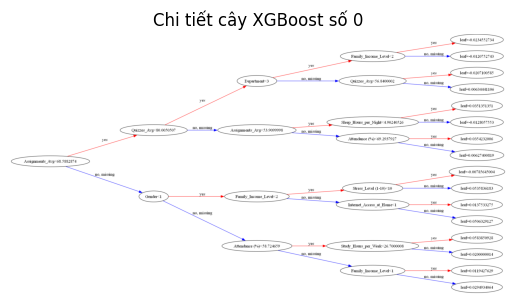

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize=(30, 15))  # tăng kích thước để hiển thị chi tiết
plot_tree(model_xgb, num_trees=0, rankdir='LR')  # Left to Right
plt.title("Chi tiết cây XGBoost số 0")
plt.show()


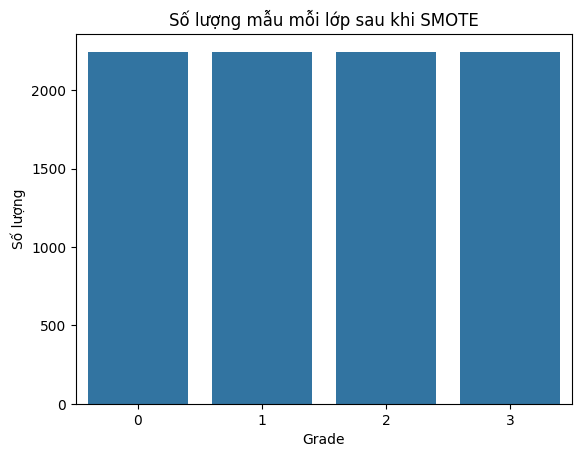

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train_bal)
plt.title("Số lượng mẫu mỗi lớp sau khi SMOTE")
plt.xlabel("Grade")
plt.ylabel("Số lượng")
plt.show()


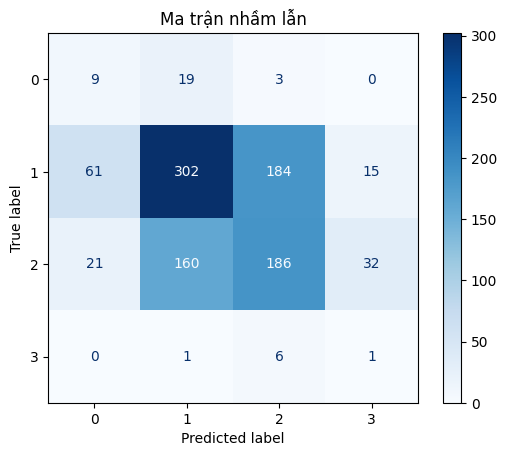

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap="Blues")
plt.title("Ma trận nhầm lẫn")
plt.show()
